In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import sys

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "C:/Users/kapali_s/Documents/SMU/Homeworks/Assignment_6/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

#convert the cities list to dataframe
cities = pd.DataFrame(cities, columns=["City"])

#Add columns needed
cities["Cloudiness"] = ""
cities["Country"] = ""
cities["Date"] = ""
cities["Humidity"] = ""
cities["Lat"] = ""
cities["Lng"] = ""
cities["Max Temp"] = ""
cities["Wind Speed"] = ""



#write the cities to csv file
cities.to_csv("C:/Users/kapali_s/Documents/SMU/Homeworks/Assignment_6/cities.csv")

# grab a sample for development
#cities_20 = cities[:20]


In [3]:
# cities.head()
#cities_20.head()


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Test API for a city.
url = "http://api.openweathermap.org/data/2.5/weather?"
city="hilo"
query_url = f"{url}appid={api_key}&q={city}"
response = requests.get(query_url)
weather_json = response.json()
weather_json

{'coord': {'lon': -155.08, 'lat': 19.71},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 291.02,
  'pressure': 1020,
  'humidity': 82,
  'temp_min': 289.26,
  'temp_max': 292.15},
 'visibility': 16093,
 'wind': {'speed': 1.5, 'deg': 200},
 'clouds': {'all': 90},
 'dt': 1553254035,
 'sys': {'type': 1,
  'id': 7881,
  'message': 0.0046,
  'country': 'US',
  'sunrise': 1553271758,
  'sunset': 1553315500},
 'id': 5855927,
 'name': 'Hilo',
 'cod': 200}

In [5]:
#Test for London
London_cloudiness = weather_json["clouds"]["all"]
London_cloudiness
London_country = weather_json["sys"]["country"]
London_country
London_dt = weather_json["dt"]
London_dt
London_Humidity = weather_json["main"]["humidity"]
London_Humidity
London_Lat = weather_json["coord"]["lat"]
London_Lat
London_lon = weather_json["coord"]["lon"]
London_lon
London_temp_max = weather_json["main"]["temp_max"]
London_temp_max
London_wind_speed = weather_json["wind"]["speed"]
London_wind_speed


1.5

In [6]:
#create a params dict that will be updated with new city each iteration
params = {"key":api_key}

for index, row in cities.iterrows():
    base_url = "http://api.openweathermap.org/data/2.5/weather?"
    
    city = row["City"]
    
    #make request
    query_url = f"{base_url}appid={api_key}&q={city}"
    response = requests.get(query_url)
    weather_json = response.json()
    weather_json
    
    print(f"Gathering results for: {city}")
    
    #skip missing values
    try:
        
        cities.loc[index, "Cloudiness"] = weather_json["clouds"]["all"]
        cities.loc[index, "Country"] = weather_json["sys"]["country"]
        cities.loc[index, "Date"] = weather_json["dt"]
        cities.loc[index, "Humidity"] = weather_json["main"]["humidity"]
        cities.loc[index, "Lat"] = weather_json["coord"]["lat"]
        cities.loc[index, "Lng"] = weather_json["coord"]["lon"]
        cities.loc[index, "Max Temp"]= weather_json["main"]["temp_max"]
        cities.loc[index, "Wind Speed"] = weather_json["wind"]["speed"]
        
        print(f"Success! Results for {city} added to dataframe!!\n")
             
    except Exception:
        print(f"Missing result ...skipping {sys.exc_info()} \n")
    
    cities.to_csv("C:/Users/kapali_s/Documents/SMU/Homeworks/Assignment_6/cities.csv")


Gathering results for: amapa
Success! Results for amapa added to dataframe!!

Gathering results for: tasiilaq
Success! Results for tasiilaq added to dataframe!!

Gathering results for: santa cruz
Success! Results for santa cruz added to dataframe!!

Gathering results for: lorengau
Success! Results for lorengau added to dataframe!!

Gathering results for: nome
Success! Results for nome added to dataframe!!

Gathering results for: ushuaia
Success! Results for ushuaia added to dataframe!!

Gathering results for: touros
Success! Results for touros added to dataframe!!

Gathering results for: louisbourg
Missing result ...skipping (<class 'KeyError'>, KeyError('clouds'), <traceback object at 0x000000000AD96D08>) 

Gathering results for: busselton
Success! Results for busselton added to dataframe!!

Gathering results for: jamestown
Success! Results for jamestown added to dataframe!!

Gathering results for: narsaq
Success! Results for narsaq added to dataframe!!

Gathering results for: ponta d

Gathering results for: tricase
Success! Results for tricase added to dataframe!!

Gathering results for: tsihombe
Missing result ...skipping (<class 'KeyError'>, KeyError('clouds'), <traceback object at 0x000000000AF243C8>) 

Gathering results for: jinxiang
Success! Results for jinxiang added to dataframe!!

Gathering results for: kungurtug
Success! Results for kungurtug added to dataframe!!

Gathering results for: impfondo
Success! Results for impfondo added to dataframe!!

Gathering results for: cap malheureux
Success! Results for cap malheureux added to dataframe!!

Gathering results for: puerto del rosario
Success! Results for puerto del rosario added to dataframe!!

Gathering results for: portland
Success! Results for portland added to dataframe!!

Gathering results for: pangnirtung
Success! Results for pangnirtung added to dataframe!!

Gathering results for: dandong
Success! Results for dandong added to dataframe!!

Gathering results for: tuatapere
Success! Results for tuatapere 

Gathering results for: peniche
Success! Results for peniche added to dataframe!!

Gathering results for: bathsheba
Success! Results for bathsheba added to dataframe!!

Gathering results for: chokurdakh
Success! Results for chokurdakh added to dataframe!!

Gathering results for: san policarpo
Success! Results for san policarpo added to dataframe!!

Gathering results for: palmer
Success! Results for palmer added to dataframe!!

Gathering results for: faanui
Success! Results for faanui added to dataframe!!

Gathering results for: havre-saint-pierre
Success! Results for havre-saint-pierre added to dataframe!!

Gathering results for: townsville
Success! Results for townsville added to dataframe!!

Gathering results for: belyy
Success! Results for belyy added to dataframe!!

Gathering results for: fez
Success! Results for fez added to dataframe!!

Gathering results for: road town
Success! Results for road town added to dataframe!!

Gathering results for: bitung
Success! Results for bitung ad

Gathering results for: elban
Success! Results for elban added to dataframe!!

Gathering results for: coahuayana
Success! Results for coahuayana added to dataframe!!

Gathering results for: uglekamensk
Success! Results for uglekamensk added to dataframe!!

Gathering results for: lakes entrance
Success! Results for lakes entrance added to dataframe!!

Gathering results for: alappuzha
Missing result ...skipping (<class 'KeyError'>, KeyError('clouds'), <traceback object at 0x000000000AF24448>) 

Gathering results for: nizhneyansk
Missing result ...skipping (<class 'KeyError'>, KeyError('clouds'), <traceback object at 0x000000000AF241C8>) 

Gathering results for: garden city
Success! Results for garden city added to dataframe!!

Gathering results for: lagoa
Success! Results for lagoa added to dataframe!!

Gathering results for: muhororo
Success! Results for muhororo added to dataframe!!

Gathering results for: bethel
Success! Results for bethel added to dataframe!!

Gathering results for: b

Gathering results for: yangambi
Success! Results for yangambi added to dataframe!!

Gathering results for: acapulco
Success! Results for acapulco added to dataframe!!

Gathering results for: los llanos de aridane
Success! Results for los llanos de aridane added to dataframe!!

Gathering results for: bubaque
Success! Results for bubaque added to dataframe!!

Gathering results for: rudbar
Missing result ...skipping (<class 'KeyError'>, KeyError('clouds'), <traceback object at 0x000000000AF24708>) 

Gathering results for: komsomolskiy
Success! Results for komsomolskiy added to dataframe!!

Gathering results for: kisanga
Success! Results for kisanga added to dataframe!!

Gathering results for: prince rupert
Success! Results for prince rupert added to dataframe!!

Gathering results for: huesca
Success! Results for huesca added to dataframe!!

Gathering results for: vertientes
Success! Results for vertientes added to dataframe!!

Gathering results for: sinnamary
Success! Results for sinnamar

Gathering results for: khani
Success! Results for khani added to dataframe!!

Gathering results for: camacha
Success! Results for camacha added to dataframe!!

Gathering results for: honningsvag
Success! Results for honningsvag added to dataframe!!

Gathering results for: culpeper
Success! Results for culpeper added to dataframe!!

Gathering results for: bah
Success! Results for bah added to dataframe!!

Gathering results for: berlevag
Success! Results for berlevag added to dataframe!!

Gathering results for: gushikawa
Success! Results for gushikawa added to dataframe!!

Gathering results for: todos santos
Success! Results for todos santos added to dataframe!!

Gathering results for: rio grande
Success! Results for rio grande added to dataframe!!

Gathering results for: barcelos
Success! Results for barcelos added to dataframe!!

Gathering results for: whitehorse
Success! Results for whitehorse added to dataframe!!

Gathering results for: vangaindrano
Success! Results for vangaindrano 

Gathering results for: knyaze-volkonskoye
Success! Results for knyaze-volkonskoye added to dataframe!!

Gathering results for: kingman
Success! Results for kingman added to dataframe!!

Gathering results for: shubarkuduk
Success! Results for shubarkuduk added to dataframe!!

Gathering results for: rocha
Success! Results for rocha added to dataframe!!

Gathering results for: egvekinot
Success! Results for egvekinot added to dataframe!!

Gathering results for: fort-shevchenko
Success! Results for fort-shevchenko added to dataframe!!

Gathering results for: pimenta bueno
Success! Results for pimenta bueno added to dataframe!!

Gathering results for: vittoria
Success! Results for vittoria added to dataframe!!

Gathering results for: broken hill
Success! Results for broken hill added to dataframe!!

Gathering results for: poya
Success! Results for poya added to dataframe!!

Gathering results for: crotone
Success! Results for crotone added to dataframe!!

Gathering results for: kyren
Success

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
cities
#print check
# cities.to_csv("C:/Users/kapali_s/Documents/SMU/Homeworks/Assignment_6/cities.csv")

City Cloudiness Country        Date Humidity    Lat     Lng  \
0               amapa         75      HN  1553252400       94  15.09  -87.97   
1            tasiilaq         80      GL  1553251800       85  65.61  -37.64   
2          santa cruz         75      US  1553254093       93  36.97 -122.03   
3            lorengau         88      PG  1553254126       97  -2.02  147.27   
4                nome          1      US  1553254112       87  30.04  -94.42   
5             ushuaia         90      AR  1553252400       87 -54.81  -68.31   
6              touros         20      BR  1553252400      100   -5.2  -35.46   
7          louisbourg                                                          
8           busselton          0      AU  1553254005       43 -33.64  115.35   
9           jamestown         44      AU  1553254127       86 -33.21   138.6   
10             narsaq         75      GL  1553251800       39  60.91  -46.05   
11      ponta delgada         20      PT  1553254108       82  37.73  -25.67   
12            kodinsk         92      RU  1553254128       72   58.6   99.18   
13      srednekolymsk          0      RU  1553254128       38  67.46  153.71   
14      tyret pervaya          0      RU  1553254128       79  53.67  102.31   
15           saleaula                                                          
16          wattegama         56      LK  1553254129       95   7.35   80.68   
17         burns lake         44      CA  1553254129       78  54.23 -125.76   
18          kadykchan                                                          
19             yambio                                                          
20           cherskiy          0      RU  1553254130       30  68.75   161.3   
21          hithadhoo         32      MV  1553254130      100   -0.6   73.08   
22       norman wells         20      CA  1553252400       79  65.28 -126.83   
23            usagara         20      TZ  1553248800       45  -2.68   32.99   
24       punta arenas         75      CL  1553253794       81 -53.16  -70.91   
25            mataura         88      NZ  1553253605       87 -46.19  168.86   
26             pandan          0      PH  1553254131       94  11.72  122.09   
27        port alfred         92      ZA  1553253874       76 -33.59   26.89   
28              kapaa         40      US  1553254093       73  22.08 -159.32   
29             matara         90      PE  1553252400       65 -13.74   -72.9   
..                ...        ...     ...         ...      ...    ...     ...   
595      port dickson         75      MY  1553252400       70   2.52  101.79   
596             nizwa         88      OM  1553254280       17  22.93   57.53   
597        sovetskaya         12      RU  1553254264        4  44.78   41.17   
598             paita          0      PE  1553252400      290  -5.09  -81.11   
599         abu dhabi          0      AE  1553251020       22  24.47   54.37   
600         pemangkat                                                          
601          catalina         20      CO  1553254281       84   8.86  -75.38   
602  kuala terengganu         75      MY  1553248800       66   5.33  103.14   
603           manaure         56      CO  1553254281       95  11.78  -72.45   
604             urgut         75      UZ  1553250600       58  39.41   67.25   
605          caucasia         80      CO  1553254282       97   7.98   -75.2   
606         skalistyy                                                          
607          ambilobe         64      MG  1553254282       89 -13.19   49.05   
608        mehtar lam         20      AF  1553252100       17  34.67   70.21   
609            bratsk          8      RU  1553253794       63  56.15  101.63   
610              faya         40      SA  1553252400       28  18.39   42.45   
611         ankazoabo         32      MG  1553254283       63 -22.29   44.51   
612           wiarton         90      CA  1553254146       86  44.74  -81.13   
613            hi

In [8]:
#Clean dataframe for graphs
cities.replace("", np.nan, inplace=True)
cities_cleaned = cities.dropna(how="any")
cities_cleaned


City  Cloudiness Country          Date  Humidity    Lat  \
0               amapa        75.0      HN  1.553252e+09      94.0  15.09   
1            tasiilaq        80.0      GL  1.553252e+09      85.0  65.61   
2          santa cruz        75.0      US  1.553254e+09      93.0  36.97   
3            lorengau        88.0      PG  1.553254e+09      97.0  -2.02   
4                nome         1.0      US  1.553254e+09      87.0  30.04   
5             ushuaia        90.0      AR  1.553252e+09      87.0 -54.81   
6              touros        20.0      BR  1.553252e+09     100.0  -5.20   
8           busselton         0.0      AU  1.553254e+09      43.0 -33.64   
9           jamestown        44.0      AU  1.553254e+09      86.0 -33.21   
10             narsaq        75.0      GL  1.553252e+09      39.0  60.91   
11      ponta delgada        20.0      PT  1.553254e+09      82.0  37.73   
12            kodinsk        92.0      RU  1.553254e+09      72.0  58.60   
13      srednekolymsk         0.0      RU  1.553254e+09      38.0  67.46   
14      tyret pervaya         0.0      RU  1.553254e+09      79.0  53.67   
16          wattegama        56.0      LK  1.553254e+09      95.0   7.35   
17         burns lake        44.0      CA  1.553254e+09      78.0  54.23   
20           cherskiy         0.0      RU  1.553254e+09      30.0  68.75   
21          hithadhoo        32.0      MV  1.553254e+09     100.0  -0.60   
22       norman wells        20.0      CA  1.553252e+09      79.0  65.28   
23            usagara        20.0      TZ  1.553249e+09      45.0  -2.68   
24       punta arenas        75.0      CL  1.553254e+09      81.0 -53.16   
25            mataura        88.0      NZ  1.553254e+09      87.0 -46.19   
26             pandan         0.0      PH  1.553254e+09      94.0  11.72   
27        port alfred        92.0      ZA  1.553254e+09      76.0 -33.59   
28              kapaa        40.0      US  1.553254e+09      73.0  22.08   
29             matara        90.0      PE  1.553252e+09      65.0 -13.74   
31               lasa        20.0      CY  1.553253e+09      64.0  34.92   
33          upernavik        32.0      GL  1.553254e+09     100.0  72.79   
34            husavik         0.0      CA  1.553254e+09      91.0  50.56   
35             dikson         8.0      RU  1.553254e+09      98.0  73.51   
..                ...         ...     ...           ...       ...    ...   
590           borovoy        56.0      RU  1.553254e+09      88.0  63.23   
591           jiuquan         0.0      CN  1.553254e+09      64.0  39.73   
592       dmitriyevka        88.0      GE  1.553254e+09     100.0  43.08   
593         salisbury        90.0      GB  1.553254e+09      81.0  51.07   
594           wuchang        56.0      CN  1.553254e+09      67.0  44.93   
595      port dickson        75.0      MY  1.553252e+09      70.0   2.52   
596             nizwa        88.0      OM  1.553254e+09      17.0  22.93   
597        sovetskaya        12.0      RU  1.553254e+09       4.0  44.78   
598             paita         0.0      PE  1.553252e+09     290.0  -5.09   
599         abu dhabi         0.0      AE  1.553251e+09      22.0  24.47   
601          catalina        20.0      CO  1.553254e+09      84.0   8.86   
602  kuala terengganu        75.0      MY  1.553249e+09      66.0   5.33   
603           manaure        56.0      CO  1.553254e+09      95.0  11.78   
604             urgut        75.0      UZ  1.553251e+09      58.0  39.41   
605          caucasia        80.0      CO  1.553254e+09      97.0   7.98   
607          ambilobe        64.0      MG  1.553254e+09      89.0 -13.19   
608        mehtar lam        20.0      AF  1.553252e+09      17.0  34.67   
609            bratsk         8.0      RU  1.553254e+09      63.0  56.15   
610              faya        40.0      SA  1.553252e+09      28.0  18.39   
611         ankazoabo        32.0      MG  1.553254e+09      63.0 -22.29   
612           wiarton        90.0      CA  1.553254e+09      86.0

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

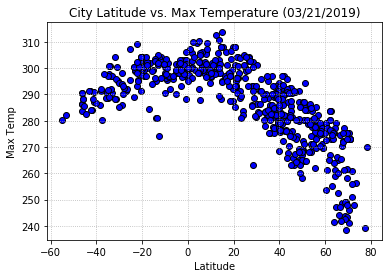

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [9]:
x_axis = cities_cleaned["Lat"]
y_axis = cities_cleaned["Max Temp"]

plt.scatter(x_axis,y_axis, color = "blue", edgecolor="black")
plt.title("City Latitude vs. Max Temperature (03/21/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid(linestyle="dotted")

# Save Figure

plt.savefig("C:/Users/kapali_s/Documents/SMU/Homeworks/Assignment_6/Lat vs. Temp.png",bbox_inches=("tight"))
plt.show()
plt.tight_layout

#### Latitude vs. Humidity Plot

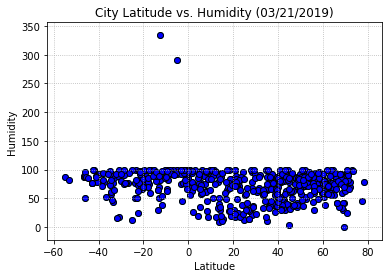

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [10]:
x_axis = cities_cleaned["Lat"]
y_axis = cities_cleaned["Humidity"]
plt.scatter(x_axis,y_axis)

plt.scatter(x_axis,y_axis, color = "blue", edgecolor="black")
plt.title("City Latitude vs. Humidity (03/21/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(linestyle="dotted")

# Save Figure

plt.savefig("C:/Users/kapali_s/Documents/SMU/Homeworks/Assignment_6/Lat vs. Humidity.png",bbox_inches=("tight"))
plt.show()
plt.tight_layout

#### Latitude vs. Cloudiness Plot

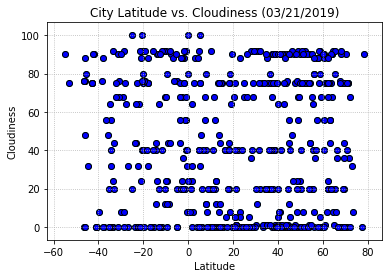

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [11]:
x_axis = cities_cleaned["Lat"]
y_axis = cities_cleaned["Cloudiness"]
plt.scatter(x_axis,y_axis)

plt.scatter(x_axis,y_axis, color = "blue", edgecolor="black")
plt.title("City Latitude vs. Cloudiness (03/21/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(linestyle="dotted")

# Save Figure
plt.savefig("C:/Users/kapali_s/Documents/SMU/Homeworks/Assignment_6/Lat vs. Cloudiness.png",bbox_inches=("tight"))
plt.show()
plt.tight_layout

#### Latitude vs. Wind Speed Plot

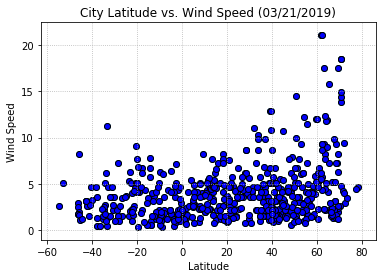

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [12]:
x_axis = cities_cleaned["Lat"]
y_axis = cities_cleaned["Wind Speed"]
plt.scatter(x_axis,y_axis)

plt.scatter(x_axis,y_axis, color = "blue", edgecolor="black")
plt.title("City Latitude vs. Wind Speed (03/21/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(linestyle="dotted")

# Save Figure
plt.savefig("C:/Users/kapali_s/Documents/SMU/Homeworks/Assignment_6/Lat vs. Wind Speed.png",bbox_inches=("tight"))
plt.show()
plt.tight_layout